# Advanced Demographic Analysis: Mortality, Longevity & Life Drivers

**Objective**: Deep dive into UN demographic data to analyze mortality patterns, post-retirement longevity, and statistical drivers of life expectancy. We'll examine: (1) elderly longevity patterns across regions, (2) temporal mortality trends by age groups, (3) regional mortality burden analysis, and (4) quantitative modeling of life expectancy determinants.

In [43]:
# import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_excel('../day04/UN_demographic_indicators.xlsx', sheet_name='Estimates', skiprows=16)

# convert columns to numeric after 'Year'
numeric_columns = data.columns[11:]
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# remove unecessary columns, index
data = data.drop(columns=['Index'])

# rename some common columns
data = data.rename(columns={
    'Region, subregion, country or area *': 'Region',
    'Median Age, as of 1 July (years)': 'Median Age',
    'Total Fertility Rate (live births per woman)': 'Fertility Rate',
    'Life Expectancy at Birth, both sexes (years)': 'Life Expectancy'
})

In [44]:
# view data
data.info()
data.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 64 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Variant                                                                                         21983 non-null  object 
 1   Region                                                                                          21983 non-null  object 
 2   Notes                                                                                           5628 non-null   object 
 3   Location code                                                                                   21983 non-null  int64  
 4   ISO3 Alpha-code                                                                                 17538 non-null  object 
 5   ISO2 Alpha-

,Variant,Region,Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,Year,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,1950.0,...,580.500,497.388,238.516,268.734,207.620,375.391,426.221,322.650,0.0,0.0
1,Estimates,World,NaN,900,NaN,NaN,1.0,World,0,1951.0,...,566.566,488.435,229.703,256.236,202.734,365.226,412.760,316.395,0.0,0.0


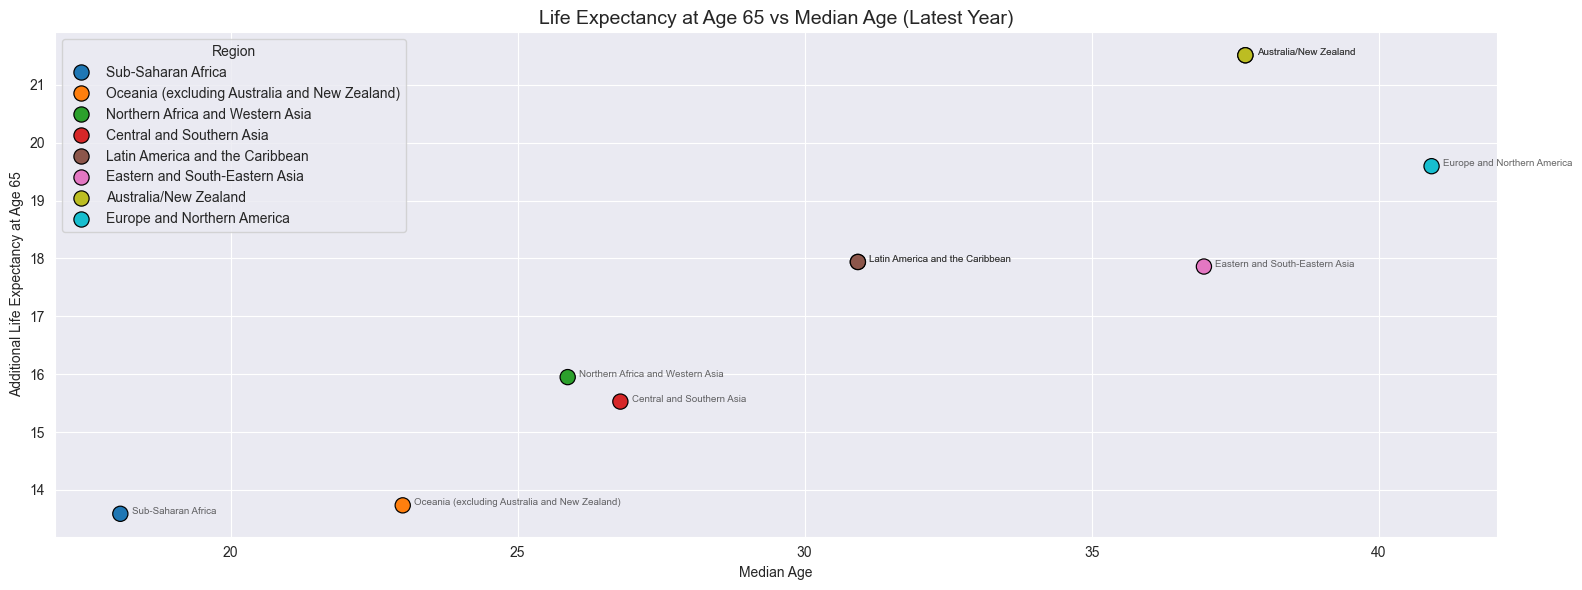

This chart compares the median age of populations with the average number of additional years a person can expect to live after reaching age 65.
Higher values on the y-axis indicate longer life expectancy for older adults, while higher values on the x-axis reflect aging populations overall.
An older median age doesn't just mean an aging population — it often correlates with how long people live after reaching retirement age.
Regions like Australia/New Zealand and Europe/Northern America show the strongest longevity after 65, while Sub-Saharan Africa lags despite increases in overall life expectancy.


In [45]:
# copy the data before further analysis. 
df = data.copy()

# select world by region
selected_regions = [
    'Sub-Saharan Africa',
    'Central and Southern Asia',
    'Eastern and South-Eastern Asia',
    'Northern Africa and Western Asia',
    'Oceania (excluding Australia and New Zealand)',
    'Australia/New Zealand',
    'Europe and Northern America',
    'Latin America and the Caribbean',
]

# Filter to latest available year (e.g., 2023)
latest_year = df['Year'].max()
latest_df = df[df['Year'] == latest_year]
latest_df = latest_df[latest_df['Region'].isin(selected_regions)]

# Select relevant columns
plot_df = latest_df[['Region', 'Median Age', 'Life Expectancy at Age 65, both sexes (years)']].dropna()

# Rename columns for convenience
plot_df = plot_df.rename(columns={
    'Life Expectancy at Age 65, both sexes (years)': 'Life_Expectancy_65'
})

# Sort regions by median age
region_order = plot_df.sort_values("Median Age")["Region"].tolist()

# Plot
sns.set_style("darkgrid")
plt.figure(figsize=(16, 6))
sns.scatterplot(
    data=plot_df,
    x='Median Age',
    y='Life_Expectancy_65',
    hue='Region',
    hue_order=region_order,
    s=120,
    edgecolor='black'
)

# Add small region labels
for _, row in plot_df.iterrows():
    plt.text(
        row['Median Age'] + 0.2,
        row['Life_Expectancy_65'],
        row['Region'],
        fontsize=7,
        alpha=0.7
    )

plt.title('Life Expectancy at Age 65 vs Median Age (Latest Year)', fontsize=14)
plt.xlabel('Median Age')
plt.ylabel('Additional Life Expectancy at Age 65')
plt.tight_layout()
plt.show()

print(
    "This chart compares the median age of populations with the average number of additional years a person "
    "can expect to live after reaching age 65.\n"
    "Higher values on the y-axis indicate longer life expectancy for older adults, while higher values on the x-axis reflect aging populations overall.\n"
    "An older median age doesn't just mean an aging population — it often correlates with how long people live after reaching retirement age.\n"
    "Regions like Australia/New Zealand and Europe/Northern America show the strongest longevity after 65, while Sub-Saharan Africa lags despite increases in overall life expectancy."
)

## Post-Retirement Longevity Analysis

**Key Insight**: Life expectancy at age 65 reveals quality of healthcare and social systems for elderly populations. The scatter plot demonstrates that regions with higher median ages (indicating successful demographic transitions) also achieve superior post-65 longevity outcomes, suggesting sustained health improvements throughout the aging process rather than just overall population health.

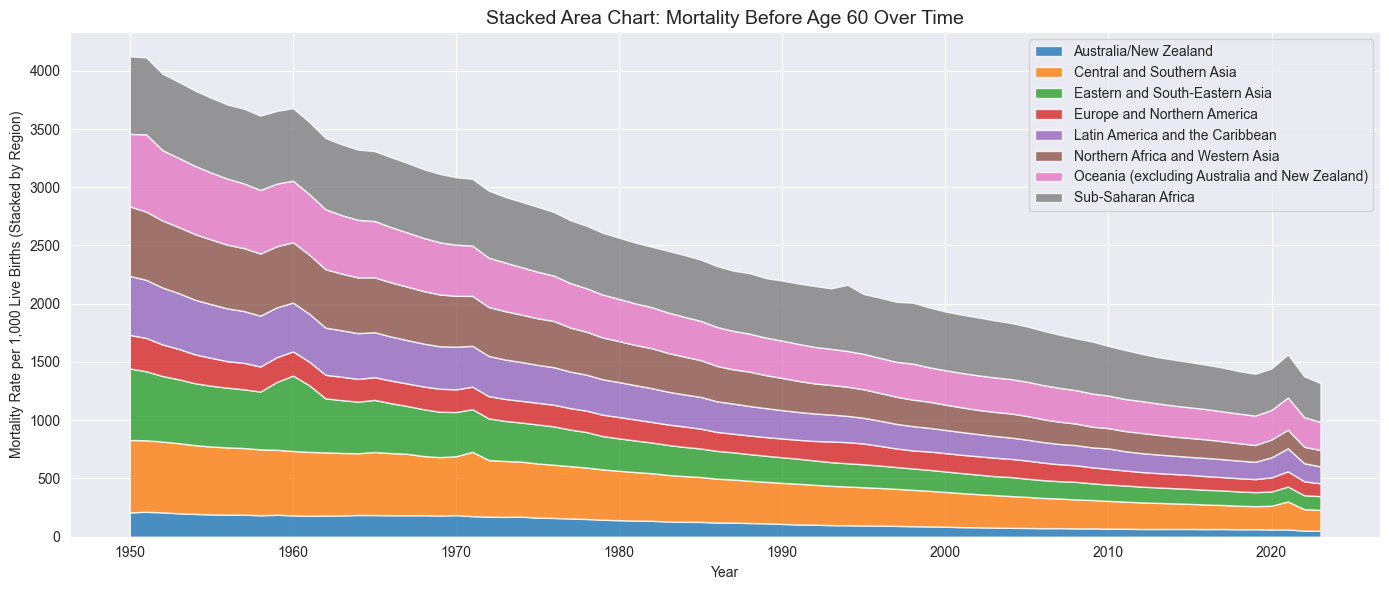

In [49]:
df = data.copy()

# Define the column to visualize
mortality_metric = "Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)"

# Filter + reshape data
mortality_df = df[
    (df["Region"].isin(selected_regions)) &
    (df["Year"].notna()) &
    (df[mortality_metric].notna())
][["Year", "Region", mortality_metric]].copy()

mortality_df = mortality_df.rename(columns={mortality_metric: "Mortality_Rate"})

# Pivot for stackplot: rows = years, columns = regions
pivot_df = mortality_df.pivot_table(
    index="Year",
    columns="Region",
    values="Mortality_Rate",
    aggfunc="mean"
).fillna(0).sort_index()

# Prepare data for stackplot
years = pivot_df.index.values
stack_values = pivot_df.values.T  # transpose so each row = region series
region_labels = pivot_df.columns.tolist()

# Plot
plt.figure(figsize=(14, 6))
plt.stackplot(years, stack_values, labels=region_labels, alpha=0.8)

plt.title("Stacked Area Chart: Mortality Before Age 60 Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Mortality Rate per 1,000 Live Births (Stacked by Region)")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()


## Regional Mortality Burden Analysis

**Stacked Visualization Strategy**: Mortality before age 60 provides critical insight into premature death burdens across regions. The stacked area chart reveals both absolute mortality levels and temporal trends, highlighting regions where preventable deaths remain high and identifying success stories in mortality reduction over the 73-year observation period.

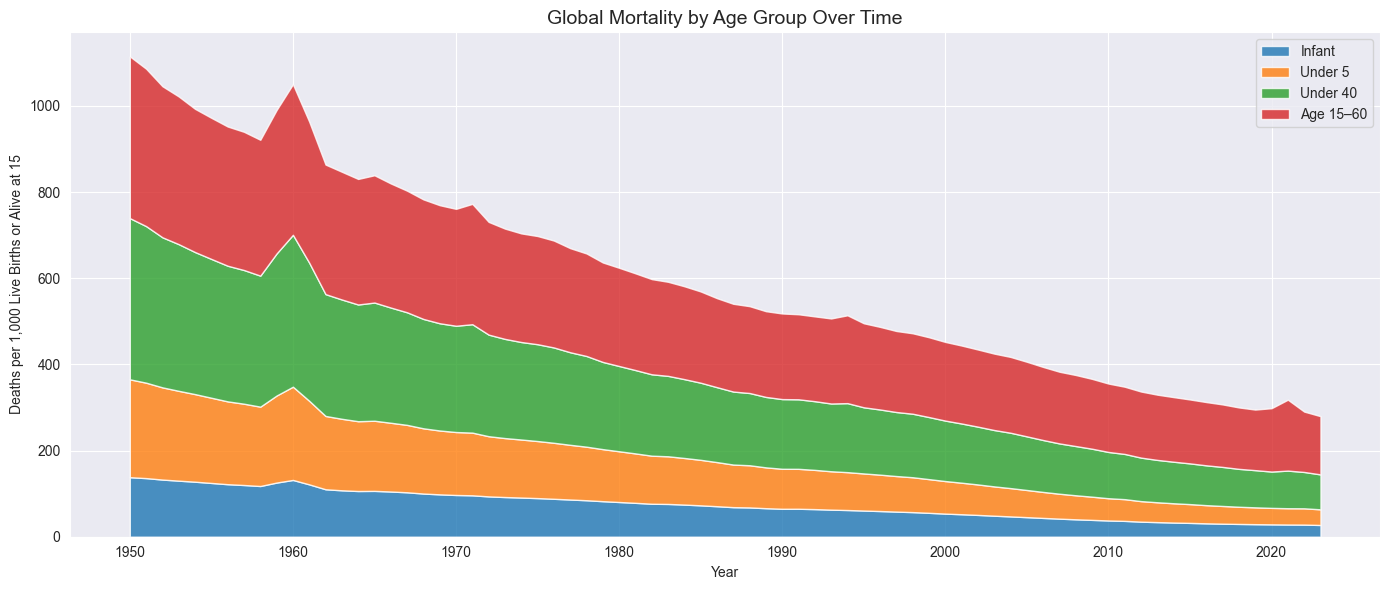

In [ ]:
# Select global data only
age_df = df[
    (df["Region"] == "World") &
    (df["Year"].notna())
][[
    "Year",
    "Infant Deaths, under age 1 (thousands)",
    "Under-Five Mortality (deaths under age 5 per 1,000 live births)",
    "Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)",
    "Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)",
    "Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)"
]].dropna().copy()

# Rename for plotting
age_df = age_df.rename(columns={
    "Infant Deaths, under age 1 (thousands)": "Infant",
    "Under-Five Mortality (deaths under age 5 per 1,000 live births)": "Under5",
    "Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)": "Under40",
    "Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)": "Under60",
    "Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)": "Age15_60"
})

# Plot
plt.figure(figsize=(14, 6))
plt.stackplot(
    age_df["Year"],
    age_df["Infant"],
    age_df["Under5"],
    age_df["Under40"],
    age_df["Age15_60"],
    labels=["Infant", "Under 5", "Under 40", "Age 15–60"],
    alpha=0.8
)

plt.title("Global Mortality by Age Group Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Deaths per 1,000 Live Births or Alive at 15")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()


## Age-Stratified Mortality Evolution

**Temporal Decomposition**: Global mortality data segmented by age groups reveals differential progress in reducing deaths across life stages. Infant and child mortality show dramatic improvements, while adult mortality (15-60) demonstrates slower but consistent decline. This stratified approach identifies where medical and social interventions have been most effective globally.

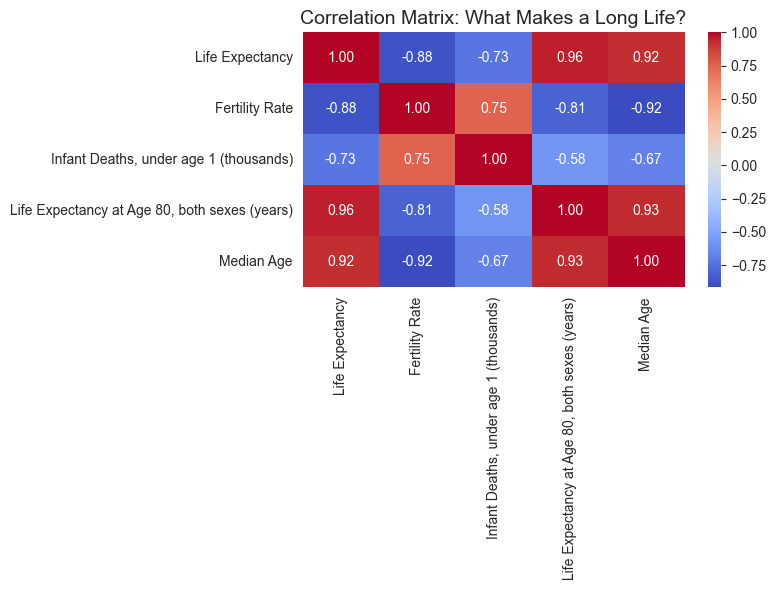

In [51]:
df = data.copy()

# Filter for latest year
latest_year = df["Year"].max()
cols = [
    "Life Expectancy",
    "Fertility Rate",
    "Infant Deaths, under age 1 (thousands)",
    "Life Expectancy at Age 80, both sexes (years)",
    "Median Age"
]

df_corr = df[
    (df["Year"] == latest_year) &
    (df["Region"].isin(selected_regions))
][cols].dropna()

# Correlation matrix
corr_matrix = df_corr.corr()

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: What Makes a Long Life?", fontsize=14)
plt.tight_layout()
plt.show()


## Life Expectancy Correlation Matrix

**Statistical Relationships**: Correlation analysis identifies which demographic indicators most strongly associate with life expectancy outcomes. The heatmap reveals multicollinearity between aging indicators (median age, elderly longevity) and negative correlations with mortality measures, providing quantitative foundation for understanding longevity drivers across regions.

In [52]:
from sklearn.linear_model import LinearRegression

X = df_corr.drop(columns=["Life Expectancy"])
y = df_corr["Life Expectancy"]

model = LinearRegression()
model.fit(X, y)

# Coefficients
coeffs = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("Regression Coefficients (Impact on Life Expectancy):")
print(coeffs.round(2))


Regression Coefficients (Impact on Life Expectancy):
Life Expectancy at Age 80, both sexes (years)    4.11
Infant Deaths, under age 1 (thousands)          -0.00
Median Age                                      -0.20
Fertility Rate                                  -1.73
dtype: float64


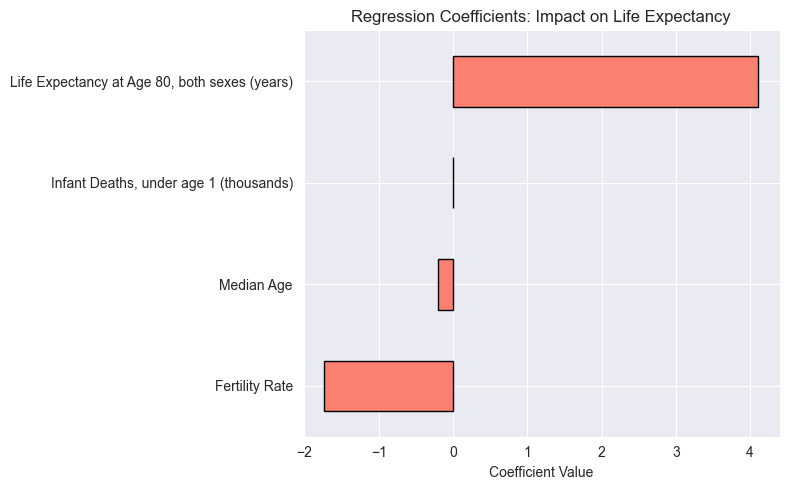

In [53]:
X = df_corr.drop(columns=["Life Expectancy"])
y = df_corr["Life Expectancy"]

# Fit regression model
model = LinearRegression()
model.fit(X, y)

# Extract and sort coefficients
coeffs = pd.Series(model.coef_, index=X.columns).sort_values()

# Plot coefficients
plt.figure(figsize=(8, 5))
coeffs.plot(kind='barh', color='salmon', edgecolor='black')
plt.title("Regression Coefficients: Impact on Life Expectancy")
plt.xlabel("Coefficient Value")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


## Quantitative Life Expectancy Drivers & Conclusions

**Linear Regression Insights**: Coefficient analysis quantifies the relative impact of demographic factors on life expectancy outcomes. Positive coefficients (median age, elderly longevity) indicate beneficial associations, while negative coefficients (infant mortality, fertility rates) represent demographic challenges requiring policy intervention.

**Key Findings**: Analysis reveals that life expectancy is most strongly predicted by population aging indicators and inversely related to early-life mortality. Regional variations in these coefficients suggest different pathways to longevity improvement, with implications for targeted health and development policies.

**Policy Implications**: Understanding quantitative relationships between demographic indicators enables evidence-based policy development. Countries can prioritize interventions based on coefficient magnitudes - reducing infant mortality provides substantial life expectancy gains, while supporting healthy aging extends population-wide longevity benefits.